In [219]:
# Bibliotecas padrão
import pandas as pd
# Bibliotecas de machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# Bibliotecas de visualização
import seaborn as sns
import matplotlib.pyplot as plt

In [220]:
#1-Preparação dos dados
#Importando a base de dados
data = pd.read_csv('dadosacoes.csv')

In [221]:
#Verificando os dados da base de dados
data.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


In [222]:
#Criando o dataframe
df = pd.DataFrame(data)

In [223]:
# Exibe os valores
df

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975
...,...,...,...,...
95,SUZB3,208,78,3035
96,VALE3,253,60,3263
97,GOOGLE,99,35,980
98,VALE3,82,43,1866


In [224]:
# Exibindo informações gerais sobre o dataframe, como tipos de dados e valores nulos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [225]:
# Exibindo estatísticas descritivas das colunas numéricas do dataframe
df.describe()


,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


Text(0.5, 1.0, 'Nome da ação X preço da ação')

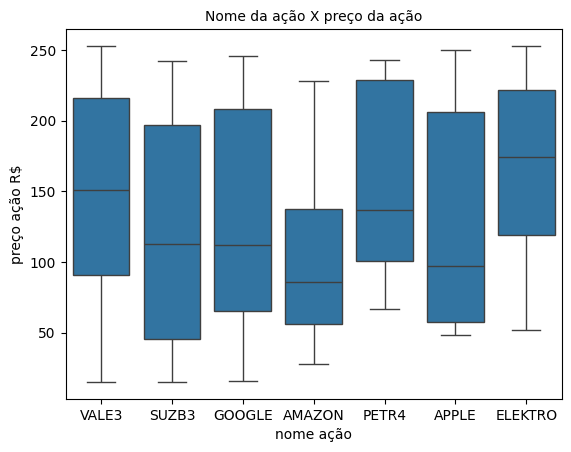

In [226]:
# Criando um boxplot para visualizar a distribuição dos preços das ações por nome da ação
sns.boxplot(x=df['nome ação'], y=df['preço ação R$'])
plt.title("Nome da ação X preço da ação", fontsize=10)

Text(0.5, 1.0, 'Nome da ação X valor de mercado')

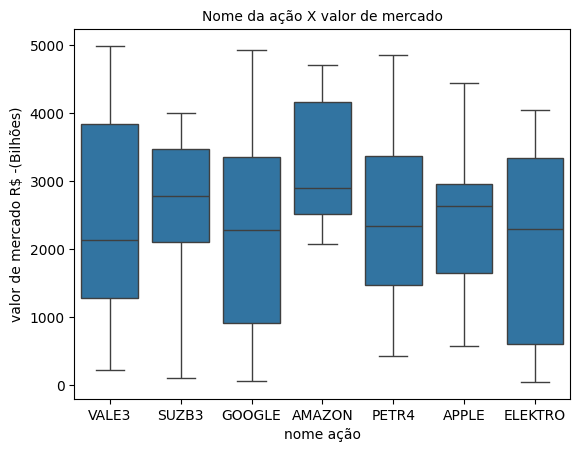

In [227]:
# Criando um boxplot para visualizar a distribuição do valor de mercado das ações em função do nome da ação
sns.boxplot(x=df['nome ação'], y=df['valor de mercado R$ -(Bilhões)'])
plt.title("Nome da ação X valor de mercado", fontsize=10)


In [228]:
# Convertendo a coluna 'nome ação' de variável categórica para variáveis binárias (One-Hot Encoding)
# A função pd.get_dummies cria colunas para cada categoria (nome da ação), e drop_first=True
# remove a primeira coluna para evitar a multicolinearidade, já que ela pode ser inferida pelas outras
df_processado = pd.get_dummies(df, columns=['nome ação'], drop_first=True)


In [229]:
# Selecionando as colunas numéricas e transformadas que serão usadas como características no algoritmo K-means
caracteristicas = ['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']
X = df_processado[caracteristicas]

In [230]:
# Normalizando as características usando o StandardScaler
# O StandardScaler transforma os dados para que tenham média 0 e desvio padrão 1, o que é importante para algoritmos como o K-means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [231]:
# Aplicando o algoritmo K-means para segmentar os dados em 4 clusters
# O parâmetro n_clusters=4 define que queremos 4 grupos (clusters).
# O random_state=42 garante que o resultado seja reprodutível, ou seja, sempre que rodar o código com os mesmos dados, os clusters serão os mesmos.
kmeans_4 = KMeans(n_clusters=4, random_state=42)
clusters_4 = kmeans_4.fit_predict(X_scaled)


In [232]:
# Adicionando a coluna 'Cluster_4' ao DataFrame com os rótulos dos clusters atribuídos pelo algoritmo K-means
# Cada linha do DataFrame recebe o número do cluster ao qual pertence, baseado na previsão do modelo K-means
df['Cluster_4'] = clusters_4


In [233]:
# Aplicando o algoritmo K-means para segmentar os dados em 5 clusters
# O parâmetro n_clusters=5 define que queremos 5 grupos (clusters).
# O random_state=42 garante que o resultado seja reprodutível.
kmeans_5 = KMeans(n_clusters=5, random_state=42)
clusters_5 = kmeans_5.fit_predict(X_scaled)

# Adicionando a coluna 'Cluster_5' ao DataFrame com os rótulos dos clusters atribuídos pelo modelo K-means
# Agora, o DataFrame terá os rótulos de cluster para 5 clusters, em vez de 4.
df['Cluster_5'] = clusters_5


In [234]:
# Aplicando o algoritmo K-means para segmentar os dados em 8 clusters
# O parâmetro n_clusters=8 define que queremos 8 grupos (clusters).
# O random_state=42 garante que o resultado seja reprodutível, ou seja, sempre que rodar o código com os mesmos dados, os clusters serão consistentes.
kmeans_8 = KMeans(n_clusters=8, random_state=42)
clusters_8 = kmeans_8.fit_predict(X_scaled)

# Adicionando a coluna 'Cluster_8' ao DataFrame com os rótulos dos clusters atribuídos pelo modelo K-means
# O DataFrame agora terá os rótulos de cluster para 8 clusters, permitindo comparações entre diferentes segmentações.
df['Cluster_8'] = clusters_8

In [235]:
df

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),Cluster_4,Cluster_5,Cluster_8
0,VALE3,194,45,2134,3,3,4
1,SUZB3,91,71,3069,1,4,2
2,SUZB3,165,41,2815,0,0,6
3,SUZB3,56,34,3613,0,0,0
4,GOOGLE,212,9,2975,0,0,6
...,...,...,...,...,...,...,...
95,SUZB3,208,78,3035,1,1,1
96,VALE3,253,60,3263,1,1,1
97,GOOGLE,99,35,980,2,2,3
98,VALE3,82,43,1866,2,2,3


In [236]:
# Calculando a inércia para diferentes valores de n_clusters (de 1 a 8) para gerar o gráfico do cotovelo
# A inércia mede a soma das distâncias quadradas entre os pontos e o centro do seu cluster (quanto menor, melhor o ajuste).
# A ideia é encontrar o "cotovelo", ou seja, o ponto em que a redução da inércia começa a desacelerar.
inercia = []
for i in range(1, 9):  # Testando de 1 a 8 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)  # Ajustando o modelo aos dados escalados
    inercia.append(kmeans.inertia_)  # Armazenando o valor da inércia para cada número de clusters


In [237]:
# Calculando a pontuação de silhueta para diferentes números de clusters (de 2 a 8)
# A pontuação de silhueta mede a qualidade do agrupamento, considerando tanto a proximidade dos pontos dentro do mesmo cluster,
# quanto a separação dos pontos entre clusters. Quanto mais alta a pontuação (próxima de 1), melhor a qualidade do agrupamento.
silhueta = []
for i in range(2, 9):  # A pontuação de silhueta requer pelo menos 2 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X_scaled)  # Atribuindo os rótulos dos clusters aos dados
    silhueta.append(silhouette_score(X_scaled, labels))  # Calculando a pontuação de silhueta para cada número de clusters


In [238]:
# Retornando a tabela com os clusters atribuídos, a lista de inércia e a lista de pontuação de silhueta
# df.head() exibe as primeiras linhas do DataFrame, incluindo as colunas de clusters formadas.
# inercia contém os valores de inércia para cada número de clusters (de 1 a 8).
# silhueta contém as pontuações de silhueta para cada número de clusters (de 2 a 8).
df.head(), inercia, silhueta


(  nome ação  preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
 0     VALE3            194          45                            2134   
 1     SUZB3             91          71                            3069   
 2     SUZB3            165          41                            2815   
 3     SUZB3             56          34                            3613   
 4    GOOGLE            212           9                            2975   
 
    Cluster_4  Cluster_5  Cluster_8  
 0          3          3          4  
 1          1          4          2  
 2          0          0          6  
 3          0          0          0  
 4          0          0          6  ,
 [300.0,
  224.97167058310058,
  170.77014106404852,
  131.703625635862,
  105.06676381922306,
  92.06131010902389,
  76.3709792480901,
  67.69265300950602],
 [np.float64(0.23738499950539907),
  np.float64(0.26186655509430934),
  np.float64(0.2726080715757644),
  np.float64(0.2979004478247124),
  np.float64(0.28634765

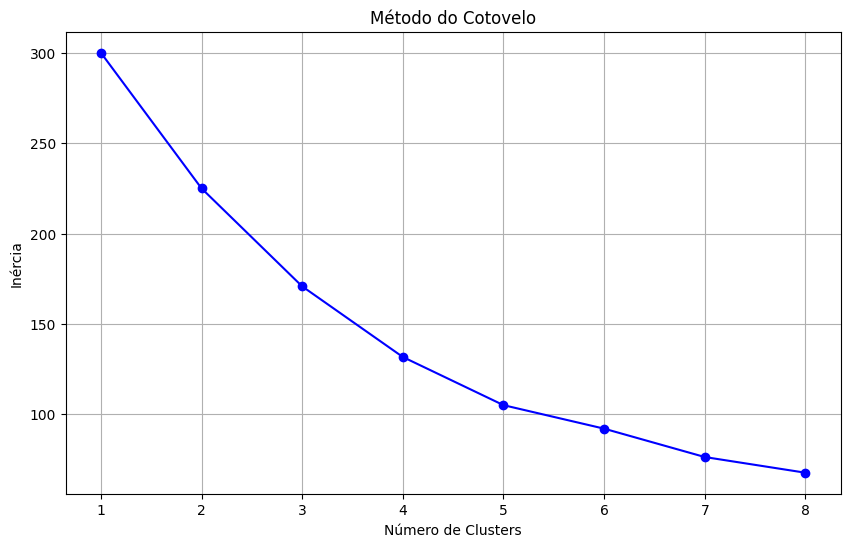

In [239]:
# Plotando o gráfico do cotovelo para visualizar a inércia em função do número de clusters
# O gráfico ajuda a identificar o número ideal de clusters, onde a redução da inércia começa a desacelerar (o "cotovelo").
plt.figure(figsize=(10, 6))
plt.plot(range(1, 9), inercia, 'bo-')  # Plotando a inércia para cada número de clusters de 1 a 8
plt.title('Método do Cotovelo')  # Título do gráfico
plt.xlabel('Número de Clusters')  # Rótulo do eixo X
plt.ylabel('Inércia')  # Rótulo do eixo Y
plt.xticks(range(1, 9))  # Definindo os valores de x (número de clusters) de 1 a 8
plt.grid(True)  # Adicionando a grade para facilitar a visualização
plt.show()  # Exibindo o gráfico


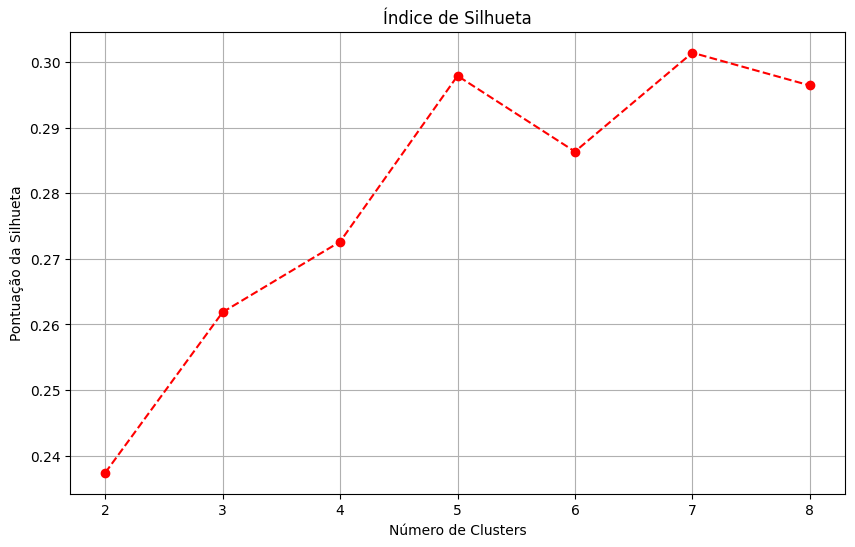

In [240]:
# Plotando o gráfico da silhueta para visualizar a pontuação de silhueta em função do número de clusters
# A pontuação de silhueta ajuda a avaliar a qualidade dos clusters formados. Quanto mais alta a pontuação, melhor o agrupamento.
plt.figure(figsize=(10, 6))
plt.plot(range(2, 9), silhueta, marker='o', linestyle='--', color='red')  # Plotando as pontuações de silhueta para cada número de clusters de 2 a 8
plt.title('Índice de Silhueta')  # Título do gráfico
plt.xlabel('Número de Clusters')  # Rótulo do eixo X
plt.ylabel('Pontuação da Silhueta')  # Rótulo do eixo Y
plt.xticks(range(2, 9))  # Definindo os valores de x (número de clusters) de 2 a 8
plt.grid(True)  # Adicionando a grade para facilitar a visualização
plt.show()  # Exibindo o gráfico


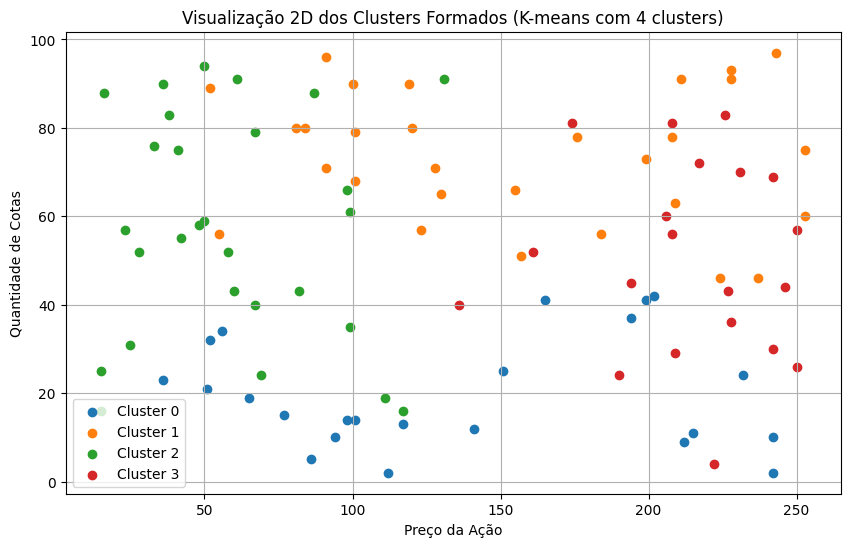

In [241]:
# Visualizando os clusters formados no plano 2D com base no preço da ação e na quantidade de cotas
# Cada ponto será colorido de acordo com o cluster ao qual pertence. A visualização ajuda a entender como os dados estão agrupados.
plt.figure(figsize=(10, 6))
for cluster in range(4):  # Iterando sobre os 4 clusters gerados pelo K-means
    # Plotando os pontos de cada cluster no gráfico 2D, com o preço da ação no eixo X e a quantidade de cotas no eixo Y
    plt.scatter(
        df[df['Cluster_4'] == cluster]['preço ação R$'],  # Filtra os dados do cluster
        df[df['Cluster_4'] == cluster]['qtde cotas'],   # Filtra os dados da quantidade de cotas
        label=f'Cluster {cluster}'  # Atribui um rótulo para cada cluster
    )
plt.title('Visualização 2D dos Clusters Formados (K-means com 4 clusters)')  # Título do gráfico
plt.xlabel('Preço da Ação')  # Rótulo do eixo X
plt.ylabel('Quantidade de Cotas')  # Rótulo do eixo Y
plt.legend()  # Exibe a legenda para identificar os clusters
plt.grid(True)  # Adiciona a grade para facilitar a visualização
plt.show()  # Exibe o gráfico


In [242]:
# Gerando um resumo estatístico das colunas numéricas do DataFrame
# O método describe() retorna informações como média, desvio padrão, valor mínimo, máximo e os quartis (25%, 50% e 75%) para cada coluna numérica.
df.describe()


,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),Cluster_4,Cluster_5,Cluster_8
count,100.000000,100.000000,100.00000,100.00000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000,1.45000,2.020000,3.03000
std,75.237942,27.475791,1397.29373,1.05768,1.463219,2.21772
min,15.000000,2.000000,52.00000,0.00000,0.000000,0.00000
25%,67.000000,28.250000,1189.25000,1.00000,1.000000,1.00000
50%,121.500000,55.500000,2433.00000,1.00000,2.000000,2.00000
75%,209.000000,76.500000,3616.50000,2.00000,3.000000,5.00000
max,253.000000,97.000000,4993.00000,3.00000,4.000000,7.00000


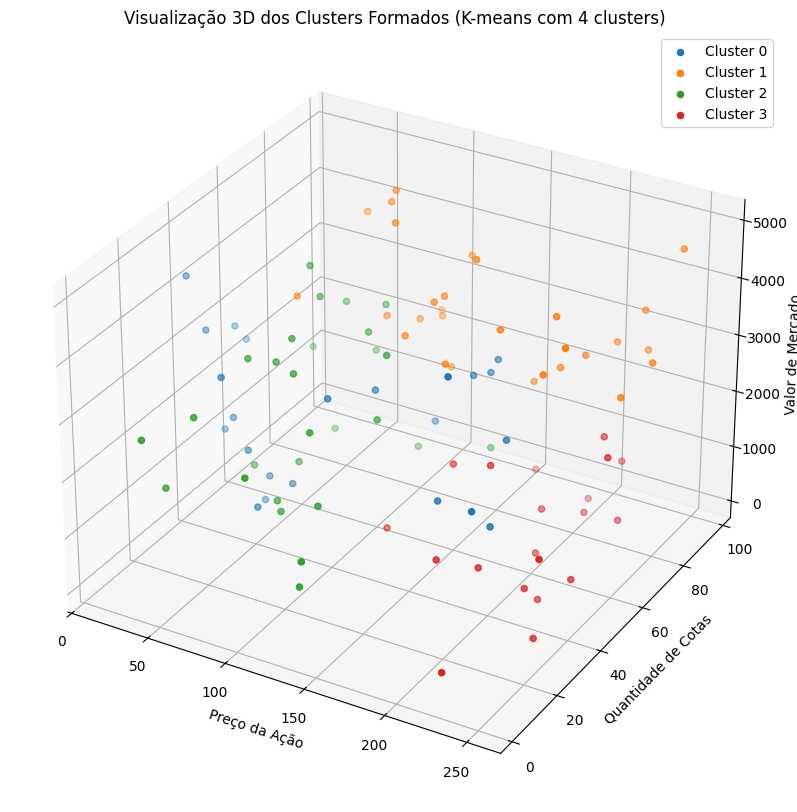

In [243]:
# Visualizando os clusters formados no espaço 3D, com as variáveis 'preço da ação', 'quantidade de cotas' e 'valor de mercado'
# Essa visualização ajuda a entender a separação dos clusters em um espaço tridimensional, considerando três características.
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')  # Criando um gráfico 3D

for cluster in range(4):  # Iterando sobre os 4 clusters gerados pelo K-means
    # Plotando os pontos de cada cluster no gráfico 3D, com as variáveis preço da ação, quantidade de cotas e valor de mercado
    ax.scatter(
        df[df['Cluster_4'] == cluster]['preço ação R$'],  # Eixo X: preço da ação
        df[df['Cluster_4'] == cluster]['qtde cotas'],   # Eixo Y: quantidade de cotas
        df[df['Cluster_4'] == cluster]['valor de mercado R$ -(Bilhões)'],  # Eixo Z: valor de mercado
        label=f'Cluster {cluster}'  # Atribuindo um rótulo para cada cluster
    )

# Definindo os rótulos e título para o gráfico
ax.set_title('Visualização 3D dos Clusters Formados (K-means com 4 clusters)')  # Título do gráfico
ax.set_xlabel('Preço da Ação')  # Rótulo do eixo X
ax.set_ylabel('Quantidade de Cotas')  # Rótulo do eixo Y
ax.set_zlabel('Valor de Mercado')  # Rótulo do eixo Z

ax.legend()  # Exibe a legenda para identificar os clusters
plt.show()  # Exibe o gráfico 3D


Qual a maior vantagem do aprendizado não supervisionado diante o aprendizado supervisionado?

A principal vantagem do aprendizado não supervisionado em relação ao aprendizado supervisionado é que ele não requer dados rotulados, o que elimina a necessidade de um processo intensivo de rotulagem e curadoria dos dados. Isso pode ser particularmente valioso quando rotular grandes volumes de dados é caro, demorado ou até inviável.

O aprendizado não supervisionado é ideal para explorar dados desconhecidos, identificando padrões, estruturas e relações que podem não ser imediatamente evidentes. Por exemplo, ele pode ser usado para descobrir clusters de dados semelhantes, detectar anomalias ou reduzir a dimensionalidade de dados complexos. Essa capacidade de descobrir informações ocultas torna-o uma ferramenta poderosa para análise exploratória de dados.

Além disso, o aprendizado não supervisionado pode servir como um ponto de partida útil para análise de dados, oferecendo uma visão preliminar do conjunto de dados antes de aplicar técnicas supervisionadas mais específicas. Ele também pode ser combinado com métodos supervisionados para melhorar a precisão e a eficiência dos modelos, como no caso de pré-processamento ou de construção de features.

Em resumo, a flexibilidade, a independência de dados rotulados e o poder de descobrir padrões desconhecidos são as principais vantagens do aprendizado não supervisionado sobre o aprendizado supervisionado.